In [2]:
%matplotlib inline

#Lowpass Filter

scipyのsignalモジュールを使ってLPFを設計し、その周波数特性をmatplotlibでグラフ表示する。  
まず、与えられたフィルタ特性からFIRフィルタのタップ係数を求めるメソッド、signal.firwin2でタップ係数のリストを取得する。  
次にタップ係数をsignal.freqzメソッドに渡し、周波数特性に変換、matplotlibで描画する。

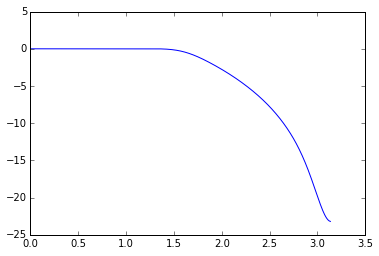

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

if __name__ == "__main__":
    n = 33
    freq = [0, 0.5, 1.0]
    gain = [1, 1, 0]
    taps = signal.firwin2(n, freq, gain)
    
    w, h = signal.freqz(taps)
    plt.plot(w, 20*np.log10(h))

#Highpass Filter
[FIR filter design with Python and SciPy](http://mpastell.com/2010/01/18/fir-with-scipy/)というブログ記事を参考にしてハイパスフィルタを作成する。  
LPFのタップ係数の正負を逆転させることで、周波数特性が反転し、HPFを実現することが出来る。

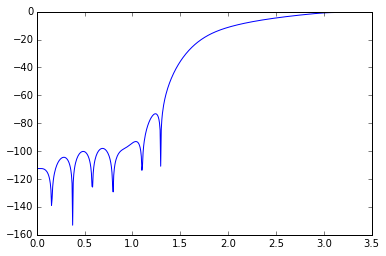

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

if __name__ == "__main__":
    n = 33
    freq = [0, 0.5, 1.0]
    gain = [1, 1, 0]
    taps = signal.firwin2(n, freq, gain)
    taps = -taps
    taps[n/2] = taps[n/2] + 1
    w, h = signal.freqz(taps)
    plt.plot(w, 20*np.log10(h))

# LPF->HPF変換について補足
上記のサンプルではLPFのタップ係数を反転させた後、中央の係数に1を足している。  
(中央の値だけ(1-tap)となっている)  
この操作にどのような意味があるのか理解出来なかったので、この操作を行う前後のインパルス応答(タップ係数)の形状を比較してみる。

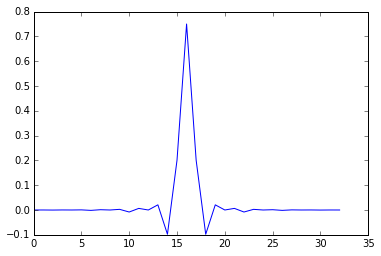

In [119]:
#LPFのタップ係数
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

if __name__ == "__main__":
    n = 33
    freq = [0, 0.5, 1.0]
    gain = [1, 1, 0]
    taps = signal.firwin2(n, freq, gain)
    plt.plot(taps)

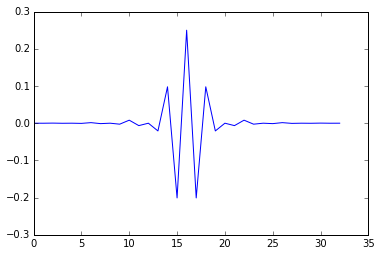

In [117]:
#HPFのタップ係数
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

if __name__ == "__main__":
    n = 33
    freq = [0, 0.5, 1.0]
    gain = [1, 1, 0]
    taps = signal.firwin2(n, freq, gain)
    taps = -taps
    taps[n/2] = taps[n/2] +1
    plt.plot(taps)

HPFのインパルス応答では中央の値と両隣の値の差分が大きく、急峻な波形となっている。  
HPFは微分回路だから、この波形のように隣り合った値の差が強調されるのは理にかなっているように思える。

# 理論
[画像工学の基礎知識](http://www001.upp.so-net.ne.jp/imagetec/imgtec/imgtec14.html)というサイトにLPF特性を元にHPFを設計する方法について説明がある。  
LPFからHPFへの変換過程はLPFの特性を正負反転させ、全体域に渡り振幅特性1を足したものと等しくなる。  
(この操作によりLPFで除去していた帯域が通過帯域になり、LPFの通過帯域が除去対象になる)  
これを時間領域での操作(タップ係数に対する計算)で考えてみると、タップ係数を正負反転させ、デルタ関数を足し合わせる操作(周波数領域で全体域振幅1の信号を足し合わせる操作)と等価になる。  
だから上記の計算過程においても同様の計算を行うことでLPF->HPF変換を実現している。  
(1を足しているのはデルタ関数を加算する操作を意味していた)
